In [2]:
!conda install -c fastai fastai
#!googleimagesdownload -k "airpods" -l 500 --chromedriver "/usr/bin/chromedriver"
#!googleimagesdownload -k "glide floss" -l 500 --chromedriver "/usr/bin/chromedriver"

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [1]:
from fastai.vision import *
from fastai.imports import *
from fastai.widgets import *
from google_images_download import google_images_download

In [5]:
folder = 'airpods'

In [4]:
folder = 'glide floss'

In [7]:
path = Path('../data/downloads')
dest = path/folder

In [8]:
dest

PosixPath('../data/downloads/airpods')

In [13]:
classes = ['airpods','glide floss']

In [15]:
!pip install webp
for c in classes:
    print(c)
    verify_images(path/c, delete=True)

airpods


glide floss


In [16]:
np.random.seed(1000)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=299, bs=32, num_workers=4).normalize(imagenet_stats)

In [17]:
data.classes

['airpods', 'glide floss']

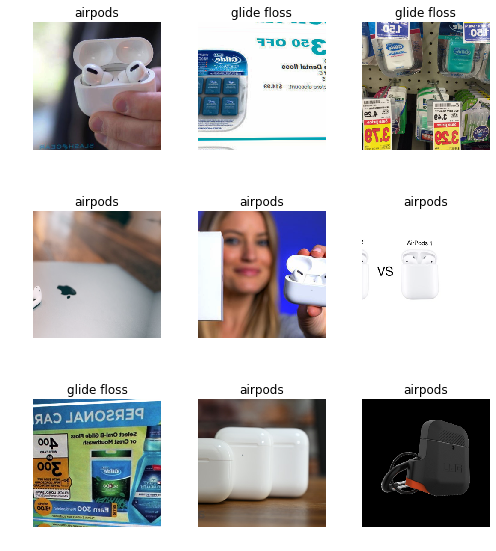

In [18]:
data.show_batch(rows=3, figsize=(7,8))

In [19]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['airpods', 'glide floss'], 2, 519, 129)

In [21]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [22]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.328481,0.128619,0.023256,00:16
1,0.202542,0.077641,0.023256,00:10
2,0.132794,0.084124,0.023256,00:11
3,0.095378,0.115929,0.031008,00:10
4,0.075237,0.080829,0.031008,00:11
5,0.057761,0.154672,0.023256,00:10
6,0.042205,0.116069,0.031008,00:10
7,0.035028,0.092073,0.023256,00:10
8,0.027331,0.091463,0.023256,00:10
9,0.025678,0.096470,0.023256,00:10


In [23]:
learn.save('airpods vs floss stage-1')

In [30]:
learn.unfreeze()

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


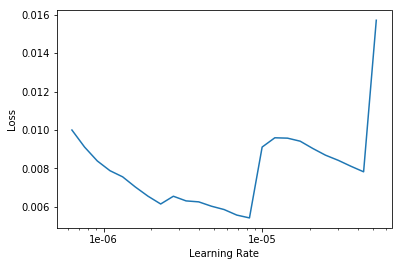

In [33]:
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(2, max_lr=slice(0.5e-5,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.011156,0.084355,0.023256,00:12
1,0.014464,0.083450,0.023256,00:12


In [35]:
learn.save('airpods vs floss stage-2')

In [36]:
learn.load('airpods vs floss stage-2');

In [37]:
interp = ClassificationInterpretation.from_learner(learn)

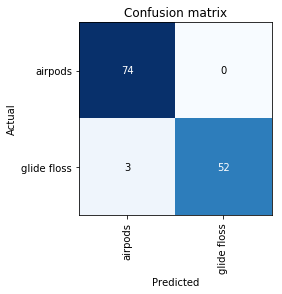

In [38]:
interp.plot_confusion_matrix()